In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2 as cv
from itertools import chain

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [3]:
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import train_test_split

In [4]:
dog_list = glob("./sibal/train/dog*")
cat_list = glob("./sibal/train/cat*")
data_list = list(chain(dog_list, cat_list))

In [5]:
y = []
for i in data_list:
    if 'dog' in i:
        y.append(0)
    else:
        y.append(1)
y = np.array(y)

In [6]:
np.sum(y)

12500

In [7]:
X = np.zeros((25000, 150, 150, 3))

In [8]:
for idx, val in enumerate(data_list):
    dt = plt.imread(val)
    dt = cv.resize(dt, (150, 150)).reshape(1, 150, 150, -1)
    X[idx] = dt[:, :, :, :3]

In [9]:
plt.imread(data_list[0]).shape

(375, 499, 3)

In [10]:
cv.resize(plt.imread(data_list[0]), (150, 150)).shape

(150, 150, 3)

In [11]:
cv.resize(plt.imread(data_list[0]), (150, 150)).reshape(1, 150, 150, -1).shape

(1, 150, 150, 3)

In [12]:
np.save("data.npy", X)

In [13]:
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2)

In [14]:
X_train, X_validation, y_train, y_validation = train_test_split(X_, y_)

In [15]:
conv_base = VGG16(include_top=False, input_shape=(150,150, 3))

In [16]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [17]:
conv_base.layers

In [18]:
a = Sequential(Dense(4*4*512, activation='relu'))

In [19]:
a.layers[0]

In [20]:
X_train_trans = conv_base.predict(X_train) 
X_validation_trans = conv_base.predict(X_validation)

157/157 [==============================] - 112s 713ms/step


In [21]:
model = Sequential(
    [
        Flatten(input_shape=X_train_trans.shape[1:]),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(1, activation='sigmoid')
    ]
)

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [23]:
model.fit(X_train_trans, y_train, batch_size=64, epochs=20, validation_data=(X_validation_trans, y_validation))

Epoch 1/20


235/235 [==============================] - 6s 22ms/step - loss: 0.1445 - accuracy: 0.9399 - val_loss: 0.1100 - val_accuracy: 0.9572
Epoch 2/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0655 - accuracy: 0.9762 - val_loss: 0.1133 - val_accuracy: 0.9594
Epoch 3/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0297 - accuracy: 0.9896 - val_loss: 0.1462 - val_accuracy: 0.9512
Epoch 4/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0225 - accuracy: 0.9928 - val_loss: 0.1595 - val_accuracy: 0.9514
Epoch 5/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0176 - accuracy: 0.9937 - val_loss: 0.1914 - val_accuracy: 0.9478
Epoch 6/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0153 - accuracy: 0.9944 - val_loss: 0.1777 - val_accuracy: 0.9532
Epoch 7/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0088 - accuracy: 0.9971 - val_loss: 0.1954 - val_accuracy: 0.95

In [24]:
model.evaluate(conv_base.predict(X_test), y_test)

157/157 [==============================] - 0s 2ms/step - loss: 0.2852 - accuracy: 0.9474


[0.2851893901824951, 0.9473999738693237]

In [25]:
dt = plt.imread("./sibal/catimg.jpg")

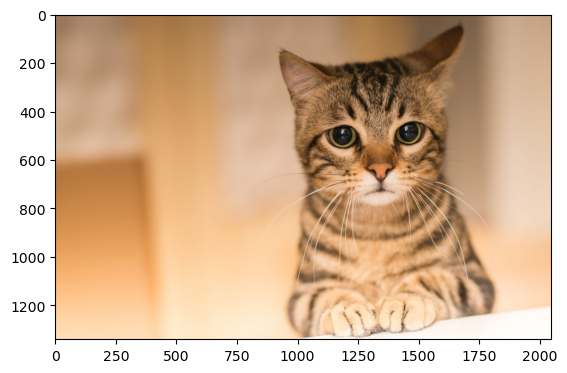

In [26]:
plt.imshow(dt)

In [27]:
def cat_dog(x):
    img = plt.imread(x)
    dt = cv.resize(img, (150,150)).reshape(1, 150, 150, -1)
    dt = dt[:, :, :, :3]
    result = np.where(model.predict(conv_base.predict(dt)) > 0.5, "고양이", "강아지")
    print(result)
    plt.imshow(img)
    plt.show()

1/1 [==============================] - 0s 81ms/step
[['고양이']]


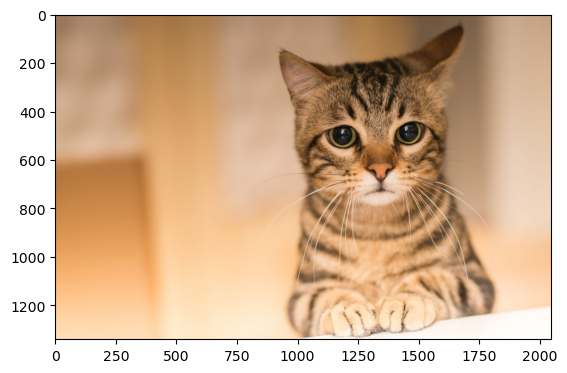

In [28]:
cat_dog("./sibal/catimg.jpg")

1/1 [==============================] - 0s 23ms/step
[['고양이']]


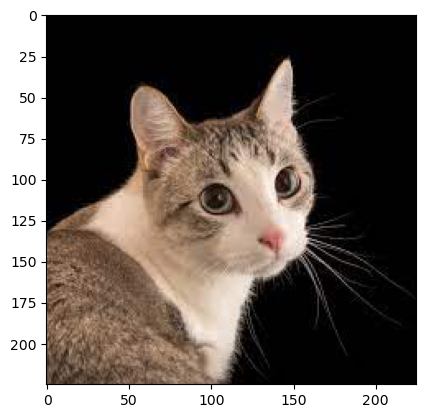

In [30]:
cat_dog("./sibal/catimg2.jpg")

1/1 [==============================] - 0s 20ms/step
[['강아지']]


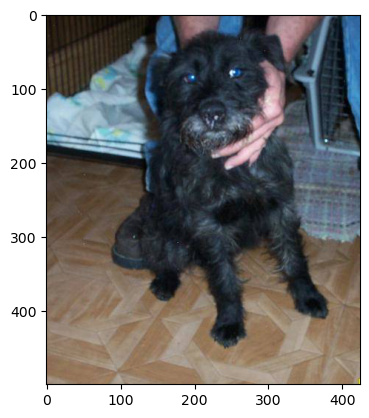

1/1 [==============================] - 0s 21ms/step
[['고양이']]


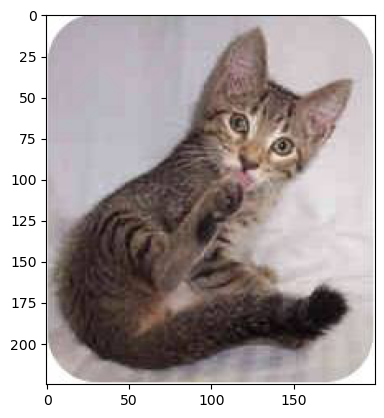

1/1 [==============================] - 0s 17ms/step
[['고양이']]


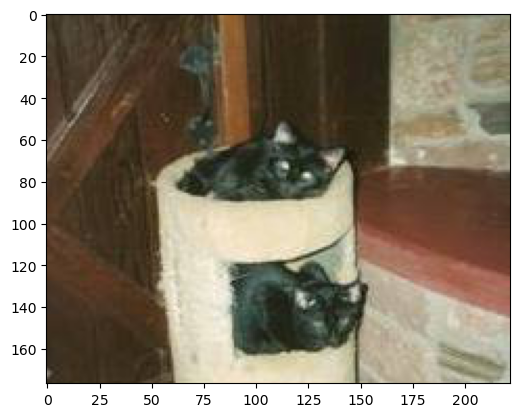

1/1 [==============================] - 0s 18ms/step
[['고양이']]


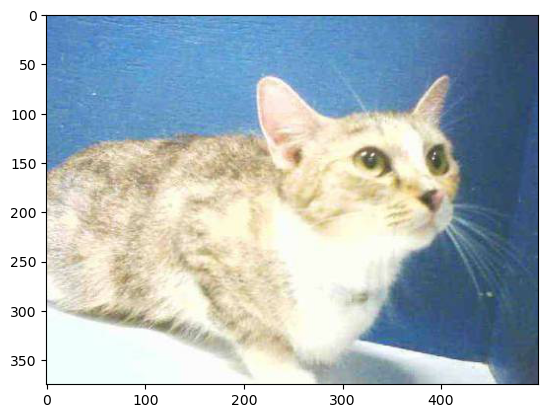

1/1 [==============================] - 0s 19ms/step
[['고양이']]


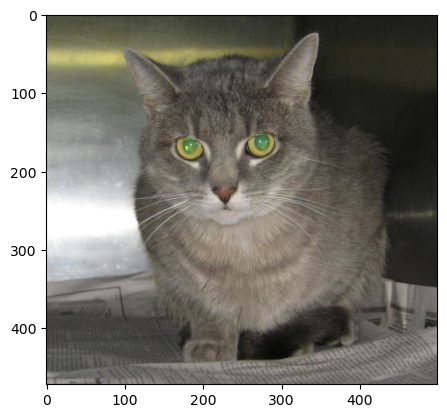

1/1 [==============================] - 0s 16ms/step
[['고양이']]


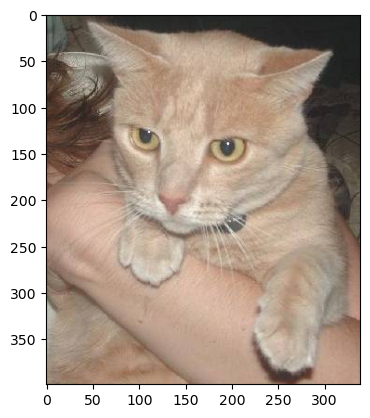

1/1 [==============================] - 0s 18ms/step
[['고양이']]


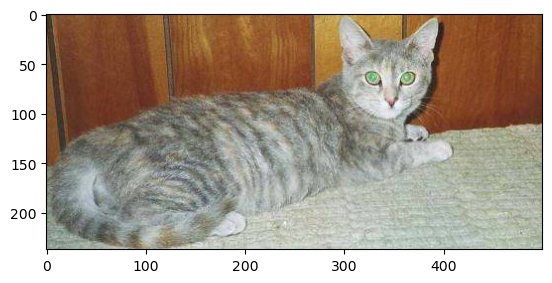

1/1 [==============================] - 0s 17ms/step
[['고양이']]


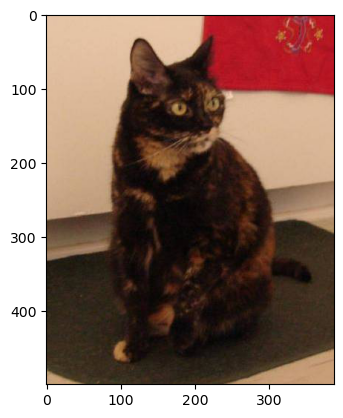

1/1 [==============================] - 0s 18ms/step
[['강아지']]


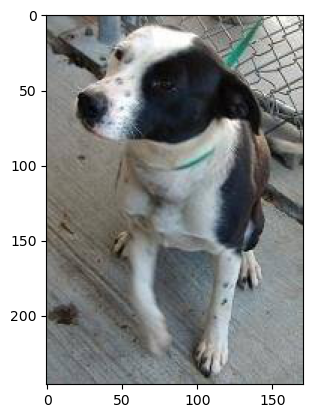

1/1 [==============================] - 0s 27ms/step
[['고양이']]


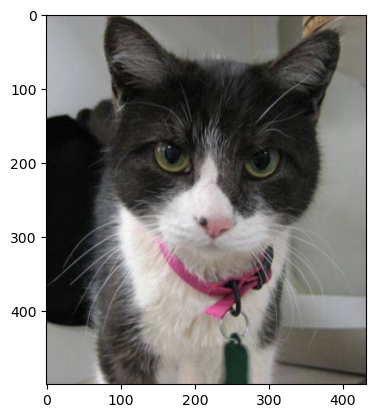

In [31]:
for i in np.random.choice(np.arange(25000), 10):
    cat_dog(data_list[i])

In [32]:
conv_base.layers[1]

In [33]:
conv_base.layers

In [49]:
model = Sequential()
model.add(conv_base)
model.add(Dense(100, activation='relu'))
model.summary()
# 밑에랑 같은 거

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 dense_10 (Dense)            (None, 4, 4, 100)         51300     
                                                                 
Total params: 14765988 (56.33 MB)
Trainable params: 14765988 (56.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
tmp = conv_base.layers
tmp.append(Dense(100, activation='relu'))
model = Sequential()
for i in tmp:
    model.add(i)
model.summary()
# 위에랑 같은 거

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 37, 37, 256)      

In [56]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [57]:
input_ = Input(shape=(150, 150, 3))
x = Conv2D(64, (3, 3), activation='relu')

In [58]:
model_test = Sequential(
    [
        Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3))
    ]
)
model_test

In [59]:
input_ = Input(shape=(150, 150, 3))
layer1 = Conv2D(64, (3, 3), activation='relu')(input_)
layer2 = MaxPooling2D((2, 2))(layer1)
layer3 = Flatten()(layer2)
layer4 = Dense(10, activation='relu')(layer3)
output_ = Dense(3, activation='softmax')(layer4)
model_test = Model(inputs=input_, outputs=output_)
model_test.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 350464)            0         
                                                                 
 dense_12 (Dense)            (None, 10)                3504650   
                                                                 
 dense_13 (Dense)            (None, 3)                 33        
                                                           

In [46]:
model_test.predict(np.random.randn(2, 150, 150, 3)).shape

1/1 [==============================] - 0s 62ms/step


(2, 3)

In [51]:
from tensorflow.keras.layers import Reshape, Concatenate

In [52]:
conv_base.layers

In [66]:
# MaxPooling2D : strides / pool_size / padding
# Conv2D : activation / kernel_size / filters / strides / padding
input_ = Input(shape=(150, 150, 3))
layer_ = input_
for layer in conv_base.layers[1:]:
    if 'conv' in repr(layer):
        activation = layer.activation
        strides = layer.strides
        kernel_size = layer.kernel_size
        filters = layer.filters
        padding = layer.padding
        layer_ = Conv2D(filters=filters, kernel_size=kernel_size, activation=activation, strides=strides, padding=padding)(layer_)
    elif 'pool' in repr(layer):
        pool_size = layer.pool_size
        strides = layer.strides
        padding = layer.padding
        layer_ = MaxPooling2D(pool_size=pool_size, strides=strides, padding=padding)(layer_)
layer_ = Flatten()(layer_)
layer_ = Dense(256, activation='relu')(layer_)
layer_ = Dense(128, activation='relu')(layer_)
layer_ = Dense(1, activation='sigmoid')(layer_)
model_test = Model(inputs=[input_], outputs=[layer_])


In [67]:
model_test.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 75, 75, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 128)       73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 75, 75, 128)       147584    
                                                           

In [69]:
model_test.predict(np.random.randn(3, 150, 150, 3))

1/1 [==============================] - 0s 146ms/step


array([[0.49851575],
       [0.4986303 ],
       [0.4985313 ]], dtype=float32)